Shape of RGB image array: (1964, 2000, 3)
Corrected shape of RGB image array: (1964, 2000, 3)


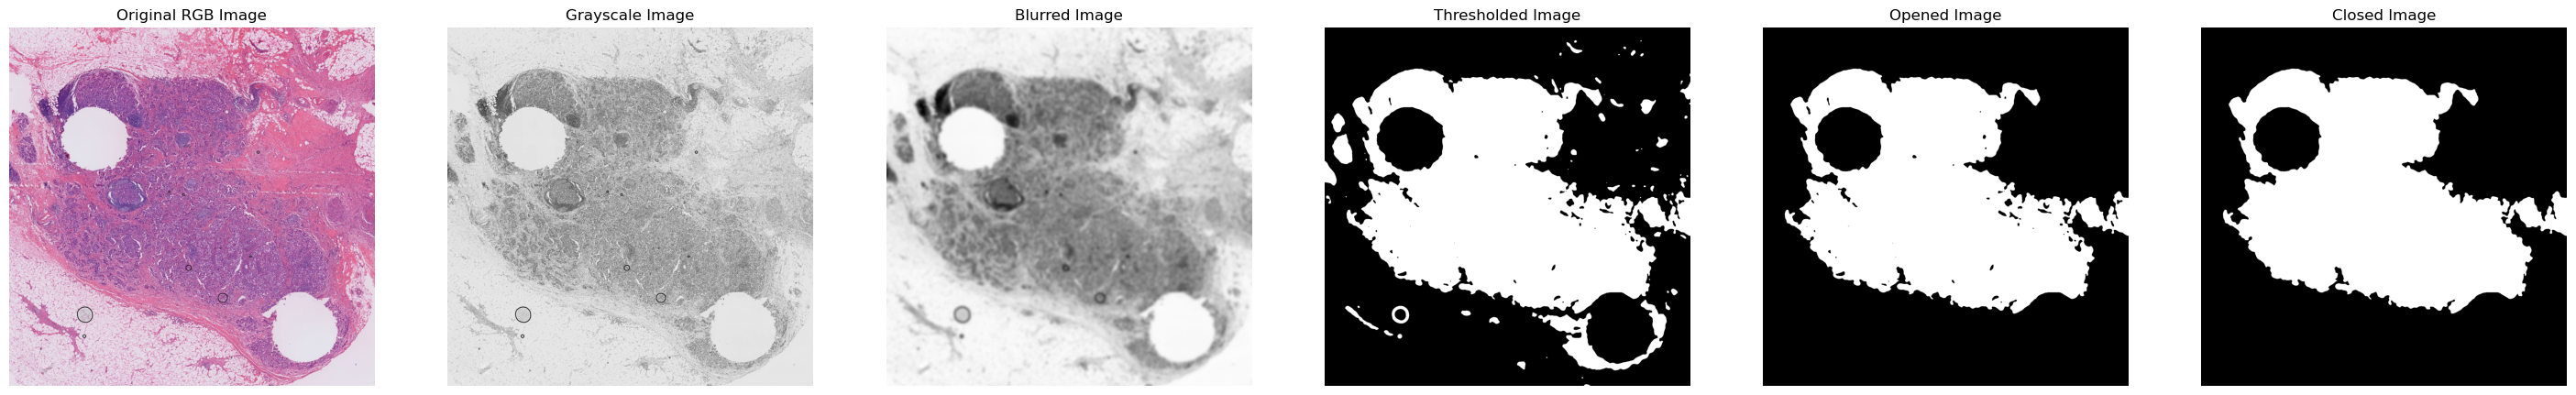

In [23]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Load the RGB image
image_path = "/tmp/work/Visium/2018838/PRE-01/spatial/tissue_hires_image.png"

rgb_image = sitk.ReadImage(image_path)

# Convert RGB to grayscale
if rgb_image.GetNumberOfComponentsPerPixel() == 3:
    gray_image = sitk.VectorIndexSelectionCast(rgb_image, 0, sitk.sitkFloat32)
    gray_image = sitk.RescaleIntensity(gray_image, outputMinimum=0, outputMaximum=255)
else:
    gray_image = sitk.RescaleIntensity(rgb_image, outputMinimum=0, outputMaximum=255)

# Apply Gaussian blur
smoothing_filter = sitk.SmoothingRecursiveGaussianImageFilter()
smoothing_filter.SetSigma(7.0)
blurred_image = smoothing_filter.Execute(gray_image)

# Apply Otsu Threshold
threshold_filter = sitk.OtsuThresholdImageFilter()
threshold_filter.SetInsideValue(1)  # Value for foreground pixels
threshold_filter.SetOutsideValue(0) # Value for background pixels
thresholded_image = threshold_filter.Execute(blurred_image)

# Apply Binary Opening to remove small objects
opening_filter = sitk.BinaryOpeningByReconstructionImageFilter()
opening_filter.SetKernelRadius(100)  # Adjust radius to control the size of particles to remove
opened_image = opening_filter.Execute(thresholded_image)

# Apply Binary Closing to fill small holes
closing_filter = sitk.BinaryClosingByReconstructionImageFilter()
closing_filter.SetKernelRadius(50)  # Adjust radius to control the size of holes to fill
closed_image = closing_filter.Execute(opened_image)

# Convert images to numpy arrays for plotting
rgb_image_array = sitk.GetArrayFromImage(rgb_image)
gray_image_array = sitk.GetArrayFromImage(gray_image)
blurred_image_array = sitk.GetArrayFromImage(blurred_image)
thresholded_image_array = sitk.GetArrayFromImage(thresholded_image)
opened_image_array = sitk.GetArrayFromImage(opened_image)
closed_image_array = sitk.GetArrayFromImage(closed_image)

# Check the shape of the RGB image array
print("Shape of RGB image array:", rgb_image_array.shape)

# Reorder RGB image array to have channels as the last dimension if necessary
if rgb_image_array.ndim == 3 and rgb_image_array.shape[1] == 3:
    rgb_image_array = np.transpose(rgb_image_array, (1, 2, 0))

# Ensure the RGB array shape is correct
print("Corrected shape of RGB image array:", rgb_image_array.shape)

# Plot the images
fig, axs = plt.subplots(1, 6, figsize=(36, 6))

# Show the original RGB image
axs[0].imshow(rgb_image_array)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

# Show the grayscale image
axs[1].imshow(gray_image_array, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

# Show the blurred image
axs[2].imshow(blurred_image_array, cmap='gray')
axs[2].set_title('Blurred Image')
axs[2].axis('off')

# Show the thresholded image
axs[3].imshow(thresholded_image_array, cmap='gray')
axs[3].set_title('Thresholded Image')
axs[3].axis('off')

# Show the opened image
axs[4].imshow(opened_image_array, cmap='gray')
axs[4].set_title('Opened Image')
axs[4].axis('off')

# Show the closed image
axs[5].imshow(closed_image_array, cmap='gray')
axs[5].set_title('Closed Image')
axs[5].axis('off')

plt.show()

In [ ]:
image_path = "/tmp/work/Visium/2018838/PRE-01/spatial/tissue_hires_image.png"
